In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Evaluation for classification

Classification is a supervised learning approach in which a target variable is discrete (or categorical). Evaluating a machine learning model is as important as building it. We are creating models to perform on new, previously unseen data. Hence, a thorough and versatile evaluation is required to create a robust model. When it comes to classification models, evaluation process gets somewhat tricky.

## Classification Accuracy
Classification accuracy shows how many of the predictions are correct.

<img src='https://miro.medium.com/max/1314/1*Pyg6Rbz96GYbKQr3OwCKww.png'>

In some cases, it represents how good a model is but there are some cases in which accuracy is simply not enough. For example, 93% means that we correctly predicted 93 out of 100 samples. It seems acceptable without knowing the details of the task.
Assume we are creating a model to perform binary classification on a dataset with an unbalanced class distribution. 93% of data points are in class A and 7% in class B.

<img src='https://miro.medium.com/max/918/1*wf_9QJy62fGzglrLfLlRlw.png'>

We have a model that only predicts class A. It is hard to even call it a “model” because it predicts class A without any calculation. However, since 93% of the samples are in class A, the accuracy of our model is 93%.


In [2]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

**Using the digits data set from scikit learn library for evaluation.**

In [3]:
data_sets = load_digits()
data_sets

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
X,y = data_sets.data,data_sets.target
for class_name,class_count in zip(data_sets.target_names, np.bincount(data_sets.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


## Creating the datasets with imbalance binary classes.
* Positive class 1 is (digit 1)
* Negative class 1 is (non digit 1)

In [5]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


### From the above output we can see that the negative class 0 is the most frequent class. lets find its size using the numpy bincount method

In [6]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [7]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y_binary_imbalanced,
                                                 random_state=0)
svm = SVC(kernel='rbf',C=1)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9955555555555555

The accracy of support vector classifier comes out to be nearly 100%.

# Dummy Classifier

A dummy classifier is a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. The classifier’s behavior is completely independent of the training data as the trends in the training data are completely ignored and instead uses one of the strategies to predict the class label.
It is used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset. It is especially useful for datasets where are sure of a class imbalance. It is based on the philosophy that any analytic approach for a classification problem should be better than a random guessing approach.

Below are a few strategies used by the dummy classifier to predict a class label –

Most Frequent: The classifier always predicts the most frequent class label in the training data.
Stratified: It generates predictions by respecting the class distribution of the training data. It is different from the “most frequent” strategy as it instead associates a probability with each data point of being the most frequent class label.
Uniform: It generates predictions uniformly at random.
Constant: The classifier always predicts a constant label and is primarily used when classifying non-majority class labels. 

source:https://www.geeksforgeeks.org/ml-dummy-classifiers-using-sklearn/

In [8]:
from sklearn.dummy import DummyClassifier
# since negative class 0 is most frequent.
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.9044444444444445

In [9]:
dummy_prediction = dummy.predict(X_test)
dummy_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Previously we have used the kernel for support vector classifier as rbf. Now, lets change the kernel to linear to predict the output.

In [10]:
svm = SVC(kernel='linear',C=1)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9777777777777777

# Confusion Matrix

<img src='https://miro.medium.com/max/924/1*7EYylA6XlXSGBCF77j_rOA.png'>

**True Positive:**

Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.


**True Negative:**

Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.


**False Positive: (Type 1 Error)**

Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.


**False Negative: (Type 2 Error)**

Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.

source=https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62


## Binary Confusion Matrix

Most frequent class (dummy classifier):
 [[407   0]
 [ 43   0]]


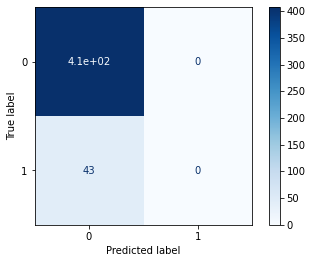

In [11]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
#negative class 0 is most frequent
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,y_train)
dummy_predicted = dummy.predict(X_test)
confusion = confusion_matrix(y_test,dummy_predicted)
plot_confusion_matrix(dummy,X_test,y_test,cmap=plt.cm.Blues)

print('Most frequent class (dummy classifier):\n',confusion)


Random class proportional Prediction (dummy classifier):
 [[356  51]
 [ 41   2]]


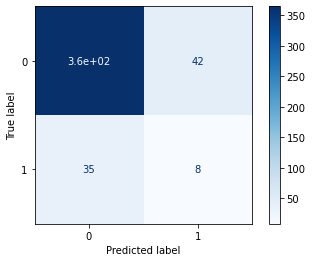

In [12]:
# produces random predictions w/ same class proportion as training set
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
dummy_predicted = dummy.predict(X_test)
confusion = confusion_matrix(y_test,dummy_predicted)
plot_confusion_matrix(dummy,X_test,y_test,cmap=plt.cm.Blues)

print('Random class proportional Prediction (dummy classifier):\n',confusion)

### Using the support vector machine

Support vector machine classifier:
 [[402   5]
 [  5  38]]


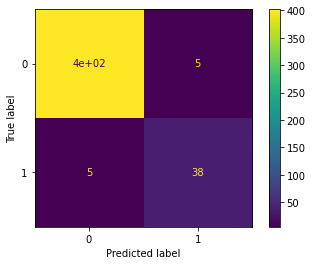

In [13]:
svm = SVC(kernel='linear',C=1)
svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)
confusion = confusion_matrix(y_test,svm_predict)
plot_confusion_matrix(svm,X_test,y_test)

print('Support vector machine classifier:\n',confusion)

### Logistic Regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Classifier:
 [[401   6]
 [  8  35]]


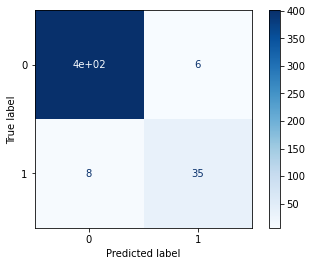

In [14]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)
confusion = confusion_matrix(y_test,lg_pred)
plot_confusion_matrix(lg,X_test,y_test,cmap=plt.cm.Blues)
print('Logistic Regression Classifier:\n',confusion)

### Decision Tree

Decision Tree Classifier:
 [[400   7]
 [ 17  26]]


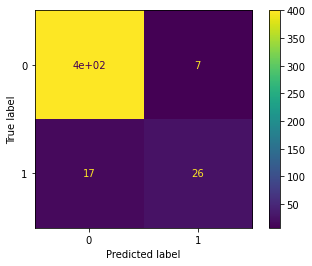

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
confusion = confusion_matrix(y_test,dt_pred)
plot_confusion_matrix(dt,X_test,y_test)

print('Decision Tree Classifier:\n',confusion)

# Evaluate Matrics for Binary Classification

<img src = 'https://secureservercdn.net/198.71.233.197/l87.de8.myftpupload.com/wp-content/uploads/2016/09/diagram-768x494.png'>
Fig. Evaluation results for classification model

Let’s dig deep into all the parameters shown in the figure above.

The first thing you will see here is ROC curve and we can determine whether our ROC curve is good or not by looking at AUC (Area Under the Curve) and other parameters which are also called as Confusion Metrics. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. All the measures except AUC can be calculated by using left most four parameters. So, let’s talk about those four parameters first.

<img src='https://secureservercdn.net/198.71.233.197/l87.de8.myftpupload.com/wp-content/uploads/2016/09/table-blog.png'>

True positive and true negatives are the observations that are correctly predicted and therefore shown in green. We want to minimize false positives and false negatives so they are shown in red color. These terms are a bit confusing. So let’s take each term one by one and understand it fully.

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

False Negatives (FN) – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

source = https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=Precision%20%2D%20Precision%20is%20the%20ratio,the%20total%20predicted%20positive%20observations.&text=F1%20score%20%2D%20F1%20Score%20is,and%20false%20negatives%20into%20account.

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,dt_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,dt_pred)))
print('recall: {:.2f}'.format(recall_score(y_test,dt_pred)))
print('f1: {:.2f}'.format(f1_score(y_test,dt_pred)))

Accuracy: 0.95
Precision: 0.79
recall: 0.60
f1: 0.68


## Combined report of all the above metrices

Displaying the classification report for the different algorithms.

In [17]:
from sklearn.metrics import classification_report
print('Random class proportional dummy\n:',
     classification_report(y_test,dummy_predicted,target_names=['Not 1','1']))
print('Svm\n:',
     classification_report(y_test,svm_predict,target_names=['Not 1','1']))
print('Logistic Regression\n:',
     classification_report(y_test,lg_pred,target_names=['Not 1','1']))
print('Decision Tree\n:',
     classification_report(y_test,dt_pred, target_names=['Not 1','1']))

Random class proportional dummy
:               precision    recall  f1-score   support

       Not 1       0.90      0.87      0.89       407
           1       0.04      0.05      0.04        43

    accuracy                           0.80       450
   macro avg       0.47      0.46      0.46       450
weighted avg       0.81      0.80      0.80       450

Svm
:               precision    recall  f1-score   support

       Not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic Regression
:               precision    recall  f1-score   support

       Not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg